# Experiments


In [2]:
from ouster import client

### Config and setup 

**Mode options:**
- MODE_UNKNOWN
- MODE_512x10
- MODE_512x20
- MODE_1024x10
- MODE_1024x20
- MODE_2048x10
- MODE_4096x5
- MODE_UNSPEC




In [3]:
os_ip_address = '10.10.40.2'

config = client.SensorConfig()
config.udp_port_lidar = 7502
config.udp_port_imu = 7503
config.operating_mode = client.OperatingMode.OPERATING_NORMAL
config.lidar_mode = client.LidarMode.MODE_1024x10

client.set_config(os_ip_address, config, persist=True, udp_dest_auto = True)

In [4]:
source = client.Sensor(os_ip_address, 7502, 7503)
info = source.metadata
info.mode

[2023-07-02 13:02:16.756] [ouster::sensor] [info] initializing sensor: 10.10.40.2 with lidar port/imu port: 7502/7503


<LidarMode.MODE_1024x10: 3>

In [7]:

# Save metadata to a file
source.write_metadata(f"{os_ip_address}.json")

## Record sensor data to file 

In [8]:
pcap_path = './data'
metadata_path = './data'

[2023-07-02 13:04:57.769] [ouster::sensor] [info] initializing sensor: 10.10.40.2 with lidar port/imu port: 7502/7503


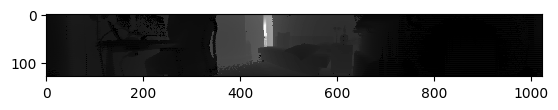

In [11]:
import matplotlib.pyplot as plt
from more_itertools import nth

source = client.Sensor(os_ip_address, 7502, 7503)

scans = client.Scans(source)

# iterate `scans` and get the 84th LidarScan (it can be different with your data)
scan = nth(scans, 84)
ranges = scan.field(client.ChanField.RANGE)

# destagger ranges, notice `metadata` use, that is needed to get
# sensor intrinsics and correctly data transforms
ranges_destaggered = client.destagger(source.metadata, ranges)

plt.imshow(ranges_destaggered, cmap='gray', resample=False)

In [10]:
from more_itertools import time_limited
from datetime import datetime
from ouster import pcap
# connect to sensor and record lidar/imu packets


source = client.Sensor(os_ip_address, 7502, 7503, buf_size=640)

n_seconds = 10 # Time limit in seconds

# make a descriptive filename for metadata/pcap files
time_part = datetime.now().strftime("%Y%m%d_%H%M%S")
meta = source.metadata
fname_base = f"{meta.prod_line}_{meta.sn}_{meta.mode}_{time_part}"

print(f"Saving sensor metadata to: {fname_base}.json")
source.write_metadata(f"{fname_base}.json")

print(f"Writing to: {fname_base}.pcap (Ctrl-C to stop early)")
source_it = time_limited(n_seconds, source)

n_packets = pcap.record(source_it, f"{fname_base}.pcap")

print(f"Captured {n_packets} packets")

[2023-07-02 13:03:56.433] [ouster::sensor] [info] initializing sensor: 10.10.40.2 with lidar port/imu port: 7502/7503
Saving sensor metadata to: OS-1-128_122141001098_1024x10_20230702_130432.json
Writing to: OS-1-128_122141001098_1024x10_20230702_130432.pcap (Ctrl-C to stop early)
Captured 6090 packets
